In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [110]:
delivery=pd.read_csv('/content/delivery_time.csv')

delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [111]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [112]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [113]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [114]:
print(type(delivery))
print(delivery.shape)

<class 'pandas.core.frame.DataFrame'>
(21, 2)


In [115]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<ipython-input-116-fd10aded87bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

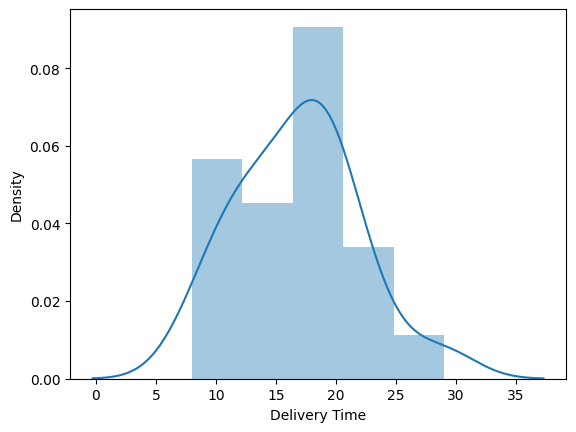

In [116]:
sns.distplot(delivery['Delivery Time'])

<ipython-input-117-bc76fa8d8dd7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

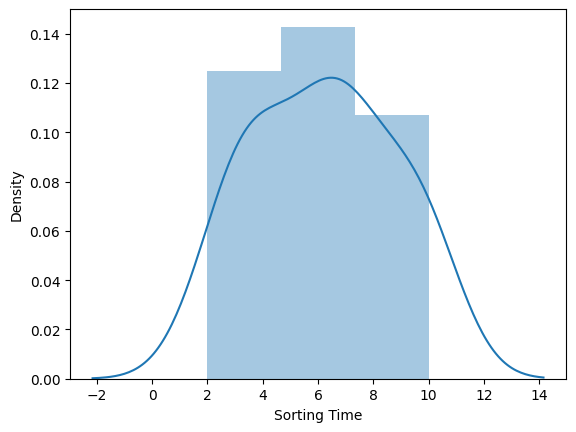

In [117]:
sns.distplot(delivery['Sorting Time'])

In [118]:
delivery=delivery.rename({'Delivery Time':'del_time','Sorting Time':'sort_time'},axis=1)

In [119]:
delivery

,del_time,sort_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [120]:
model=smf.ols("del_time~sort_time",data=delivery).fit()

In [121]:
model

In [122]:
model.params

Intercept    6.582734
sort_time    1.649020
dtype: float64

In [123]:
delivery_time=(6.582734)+(1.649020)*5
delivery_time

14.827834

In [124]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [125]:
print(model.tvalues,'/n',model.pvalues)

Intercept    3.823349
sort_time    6.387447
dtype: float64 /n Intercept    0.001147
sort_time    0.000004
dtype: float64


<Axes: xlabel='sort_time', ylabel='del_time'>

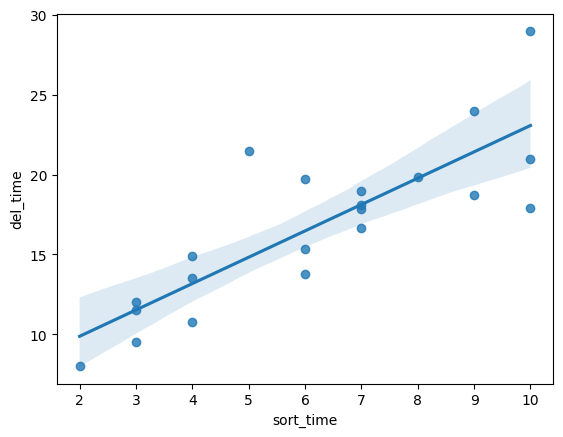

In [126]:
sns.regplot(x='sort_time',y='del_time',data=delivery)

In [127]:
model.pvalues

Intercept    0.001147
sort_time    0.000004
dtype: float64

In [128]:
model.pvalues[0]

0.0011469823923422246

In [129]:
model.pvalues[1]

3.983049566687784e-06

In [130]:
s1=float(3.983049566687784e-06)
"{:.8f}".format(float(3.983049566687784e-06))

'0.00000398'

In [131]:
if s1<0.05:
  print('reject Ho')
else:
  print('fail to reject Ho')


reject Ho


In [132]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [133]:
data_pred=pd.DataFrame(new_data,columns=['sort_time'])
data_pred

,sort_time
0,5
1,8


In [134]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

Q2.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [136]:
salary=pd.read_csv('/content/Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [137]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [138]:
salary.tail(10)

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [139]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [140]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [141]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [142]:
print(type(salary))
print(salary.shape)

<class 'pandas.core.frame.DataFrame'>
(30, 2)


In [143]:
salary.dtypes


YearsExperience    float64
Salary             float64
dtype: object

<ipython-input-144-33ed0909a501>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

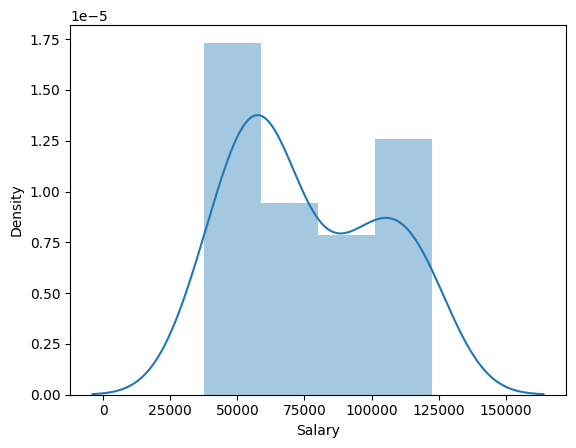

In [144]:
sns.distplot(salary["Salary"])

<ipython-input-145-3772428e01f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary["YearsExperience"])


<Axes: xlabel='YearsExperience', ylabel='Density'>

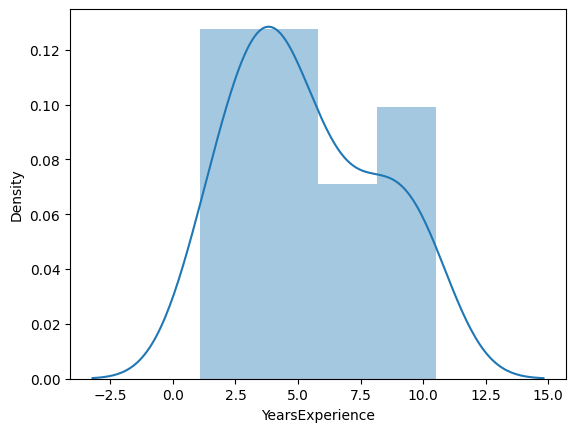

In [145]:
sns.distplot(salary["YearsExperience"])

In [146]:
model=smf.ols("Salary~YearsExperience",data=salary).fit()
model

In [147]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [148]:
salary1=(25792.200199)+(9449.962321)*3
salary1

54142.087162

In [149]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [150]:
(model.rsquared,model.rsquared_adj )#good reg

(0.9569566641435086, 0.9554194021486339)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

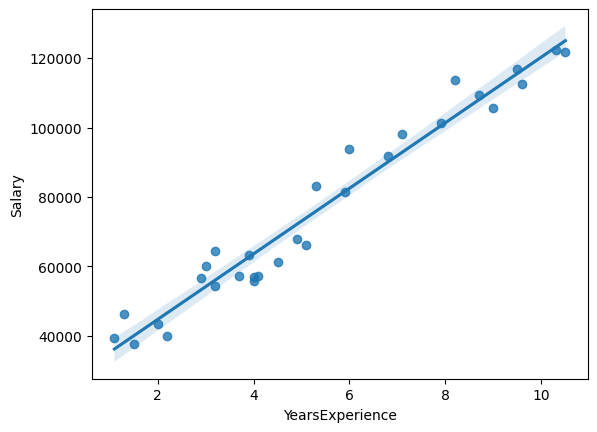

In [152]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'])

In [153]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [154]:
model.pvalues[0]

5.5119502709563214e-12

In [155]:
model.pvalues[1]

1.1430681092271316e-20

In [158]:
f0=float(5.5119502709563214e-12)
"{:.8f}".format(float(5.5119502709563214e-12))


'0.00000000'

In [159]:
f1=float(1.1430681092271316e-20)
"{:.8f}".format(float(1.1430681092271316e-20))

'0.00000000'

In [160]:
new_data=pd.Series([3,7])
new_data

0    3
1    7
dtype: int64

In [161]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,7


In [162]:
model.predict(data_pred)

0    54142.087163
1    91941.936449
dtype: float64